<a href="https://colab.research.google.com/github/Jaicobremon/StockPredictionAlgorithm/blob/main/StockPredictor_Jaicob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
Epoch 1/50
16/16 [==============================] - 16s 334ms/step - loss: 0.0924
Epoch 2/50
16/16 [==============================] - 5s 331ms/step - loss: 0.0164
Epoch 3/50
16/16 [==============================] - 5s 286ms/step - loss: 0.0080
Epoch 4/50
16/16 [==============================] - 3s 165ms/step - loss: 0.0045
Epoch 5/50
16/16 [==============================] - 3s 166ms/step - loss: 0.0042
Epoch 6/50
16/16 [==============================] - 3s 165ms/step - loss: 0.0044
Epoch 7/50
16/16 [==============================] - 3s 164ms/step - loss: 0.0041
Epoch 8/50
16/16 [==============================] - 3s 163ms/step - loss: 0.0038
Epoch 9/50
16/16 [==============================] - 3s 166ms/step - loss: 0.0034
Epoch 10/50
16/16 [==============================] - 3s 163ms/step - loss: 0.0038
Epoch 11/50
16/16 [==============================] - 3s 165ms/step - loss: 0.0034
Epoch 12/50
16/16 [==================

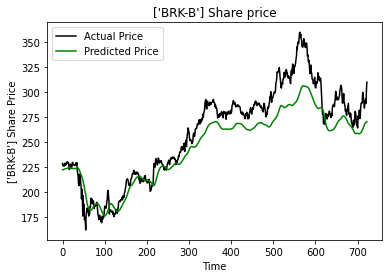

1/1 [==============================] - 1s 1s/step
Prediction is [[270.95325]]


In [4]:
#Made by Jaicob Remon

# Download yfinace module
# %pip install yfinance

# Importing modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.layers import Lambda
import yfinance as yf


# Loading data
company = ['BRK-B']

# Dates for training data
data = yf.download(company,start="2012-1-1",end="2020-1-1")

#Scaling the data for the model
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

# How many days we use for predicting prices
prediction_days = 60

# Declating x and y training variables
x_train = []
y_train = []

# Putting data into x and y train
for x in range(prediction_days,len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])

# Converting data into arrays and then reshaping
x_train , y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

# Model type and model details
model = Sequential()
model.add(LSTM(units = 50, return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Model settings
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50,batch_size=128)

#Accuracy testing data
test_data = yf.download(company,start="2020-1-1",end="2022-11-13")
actual_prices = test_data['Close'].values

# Combining datasets
total_dataset = pd.concat((data['Close'],test_data['Close']),axis = 0)

#Assigning value to model_input to make chart
model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

#Making predictions on test data
x_test = []

# Putting model_inputs into x_test
for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

# Reshaping data
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

#Declaring predicted prices variable
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

#Plotting test predictions
plt.plot(actual_prices,color="black",label=f"Actual Price")
plt.plot(predicted_prices,color="green",label=f"Predicted Price")
plt.title(f"{company} Share price")
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()

# Setting up real data for prediction
real_data = [model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

# Predicting next day closing price
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction is {prediction}")